In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
date_cols = [2, 19, 20, 26, 29, 30]
injuries = pd.read_csv('data/injuries_cleaned.csv', parse_dates=date_cols)


In [3]:
# Define features and target
bool_variables = ['surgery', 'sprain', 'broken', 'bruise', 'strain']
cat_features = ['GroupPosition', 'main_body_part']
numeric_features = ['Height', 'Weight', 'age_at_injury']
features = bool_variables + cat_features + numeric_features

X = injuries[features]
y = injuries['log_days_injured']

In [18]:
X_dummies = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=123)

# Define hyperparameters for Gradient Boosting
n_estimators = [100, 150, 200, 250, 300]
learning_rate = [0.01, 0.05, 0.1]
max_depth = [3, 5, 7, 9]

In [19]:
grid = GridSearchCV(GradientBoostingRegressor(), 
                    {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}, 
                    scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='neg_mean_absolute_error')

In [20]:
boosting_model = grid.best_estimator_
boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200)

In [21]:
importances = boosting_model.feature_importances_
importance_df = pd.DataFrame({'feature': X_dummies.columns, 'importance': importances})

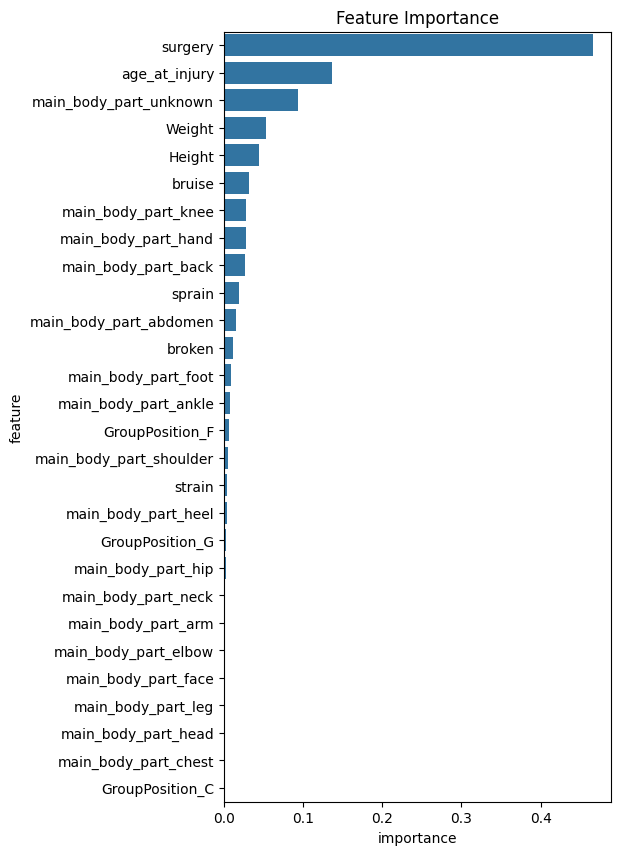

In [22]:
# Plot feature importance
order = importance_df.sort_values(by='importance', ascending=False)['feature']
plt.figure(figsize=(5, 10))
sns.barplot(x=importance_df['importance'], y=importance_df['feature'], order=order)
plt.title('Feature Importance')
plt.show()

In [23]:
# Predictions and evaluation
boosting_pred = boosting_model.predict(X_test)
print('Gradient Boosting MAE:', mean_absolute_error(y_test, boosting_pred))

Gradient Boosting MAE: 1.2793227928090458
